In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline



In [2]:
df=pd.read_csv('/content/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.shape

(1000, 8)

In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.isnull().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.nunique()

,0
gender,2
race_ethnicity,5
parental_level_of_education,6
lunch,2
test_preparation_course,2
math_score,81
reading_score,72
writing_score,77


In [10]:
print(" Categories in 'gender' variable:", end="")
print(df['gender'].unique())
print(" Categories in 'race_ethnicity' variable:", end="")
print(df['race_ethnicity'].unique())
print(" Categories in 'parental_level_of_education' variable:", end="")
print(df['parental_level_of_education'].unique())
print(" Categories in 'lunch' variable:", end="")
print(df['lunch'].unique())
print(" Categories in 'test_preparation_course' variable:", end="")
print(df['test_preparation_course'].unique())

 Categories in 'gender' variable:['female' 'male']
 Categories in 'race_ethnicity' variable:['group B' 'group C' 'group A' 'group D' 'group E']
 Categories in 'parental_level_of_education' variable:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 Categories in 'lunch' variable:['standard' 'free/reduced']
 Categories in 'test_preparation_course' variable:['none' 'completed']


In [11]:
numerical_features=[feature for feature in df.columns if df[feature].dtype !='object']


In [12]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='object']

In [13]:
print('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical_features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical_features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df['Total_score']=df["math_score"]+df["reading_score"]+df["writing_score"]
df['Avg']=df['Total_score']/3

In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avg
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
Reading_fullmark= df[df['reading_score']==100]['Avg'].count()
Writing_fullmark= df[df['writing_score']==100]['Avg'].count()
math_fullmark= df[df['math_score']==100]['Avg'].count()

In [17]:
print(f'Number of students with full mark in Reading: {Reading_fullmark}')
print(f'Number of students with full mark in Reading: {Writing_fullmark}')
print(f'Number of students with full mark in Reading: {math_fullmark}')

Number of students with full mark in Reading: 17
Number of students with full mark in Reading: 14
Number of students with full mark in Reading: 7


In [18]:
Reading_Lessthan20= df[df['reading_score']<=20]['Avg'].count()
Writing_Lessthan20= df[df['writing_score']<=20]['Avg'].count()
math_Lessthan20= df[df['math_score']<=20]['Avg'].count()

In [19]:
print(f'Number of students with less than 20 marks in Reading: {Reading_Lessthan20}')
print(f'Number of students with less than 20 marks in Reading: {Writing_Lessthan20}')
print(f'Number of students with less than 20 marks in Reading: {math_Lessthan20}')

Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Reading: 3
Number of students with less than 20 marks in Reading: 4


<Axes: xlabel='Avg', ylabel='Count'>

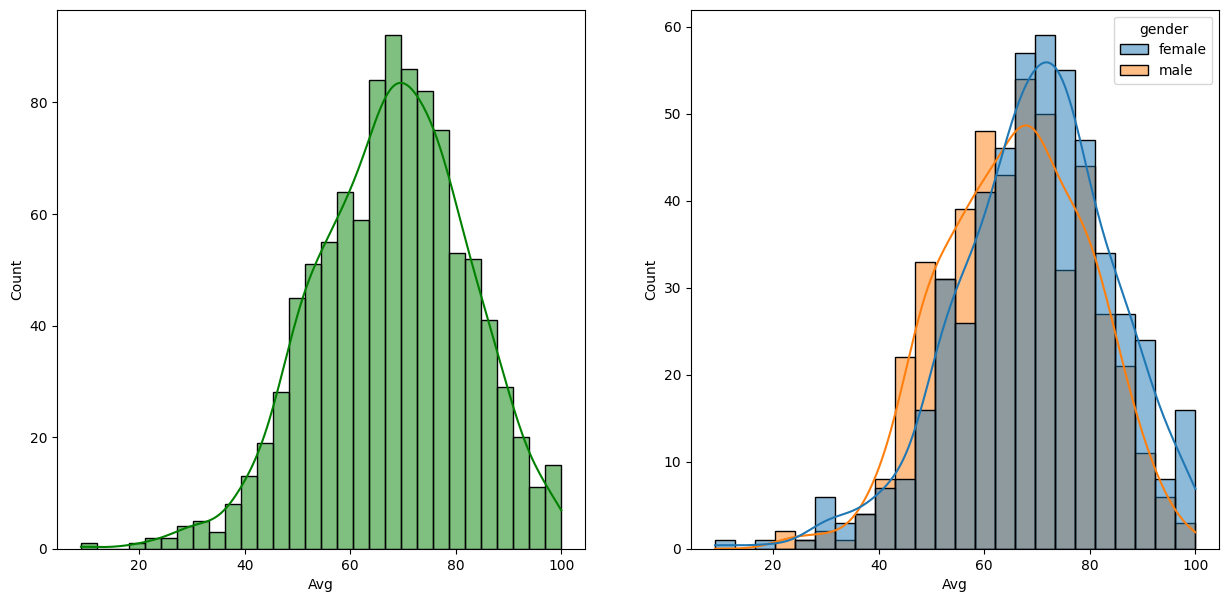

In [27]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Avg', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Avg', kde=True, hue='gender')


<Axes: xlabel='Total_score', ylabel='Count'>

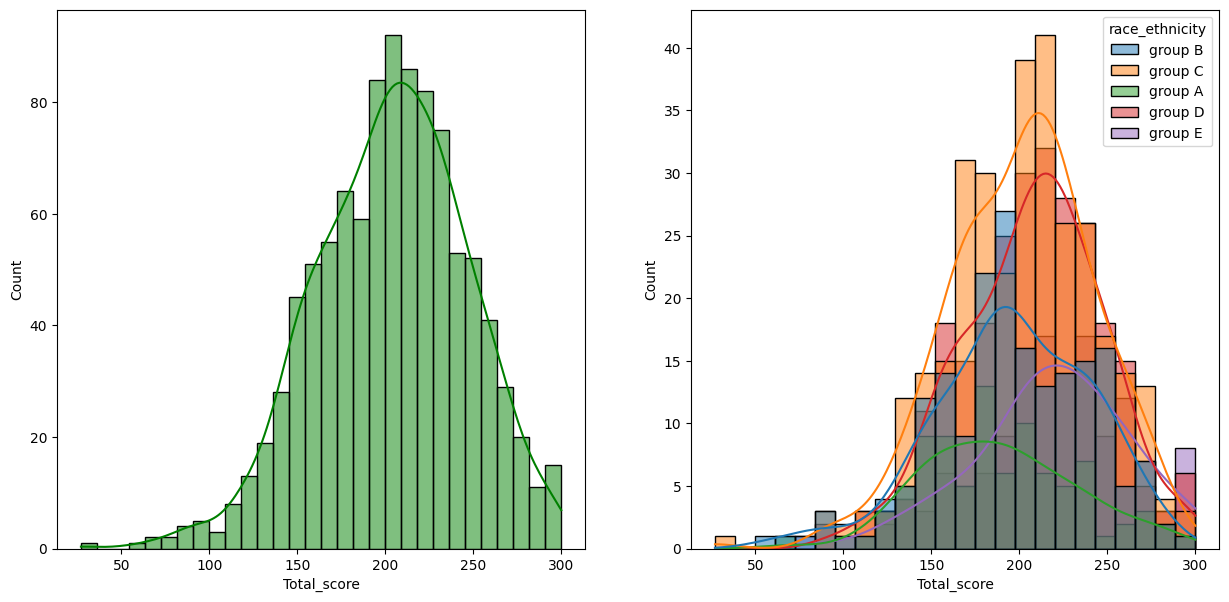

In [29]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Total_score', kde=True, hue='race_ethnicity')


In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Total_score', kde=True, hue='race_ethnicity')

<Axes: xlabel='Avg', ylabel='Count'>

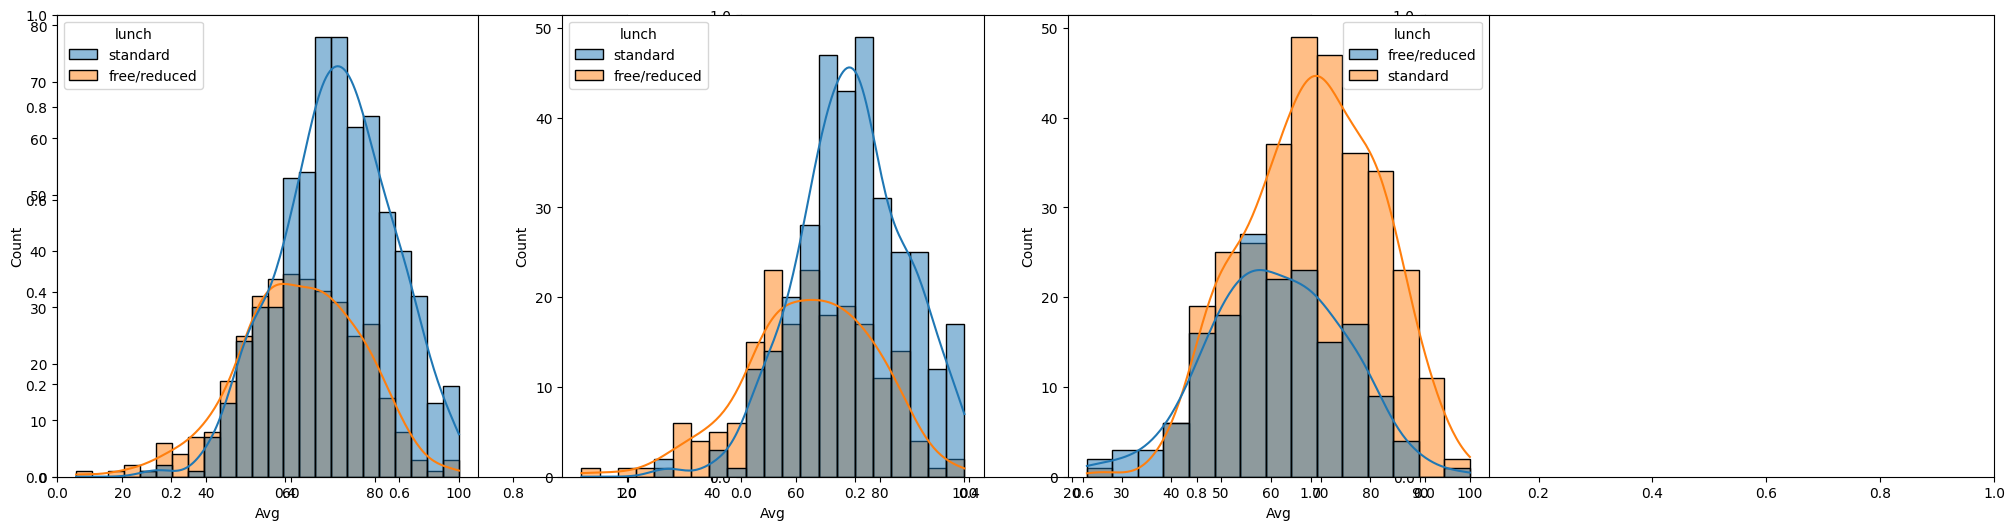

In [38]:
fig, axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Avg', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Avg', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='Avg', kde=True, hue='lunch')


<Axes: xlabel='Avg', ylabel='Count'>

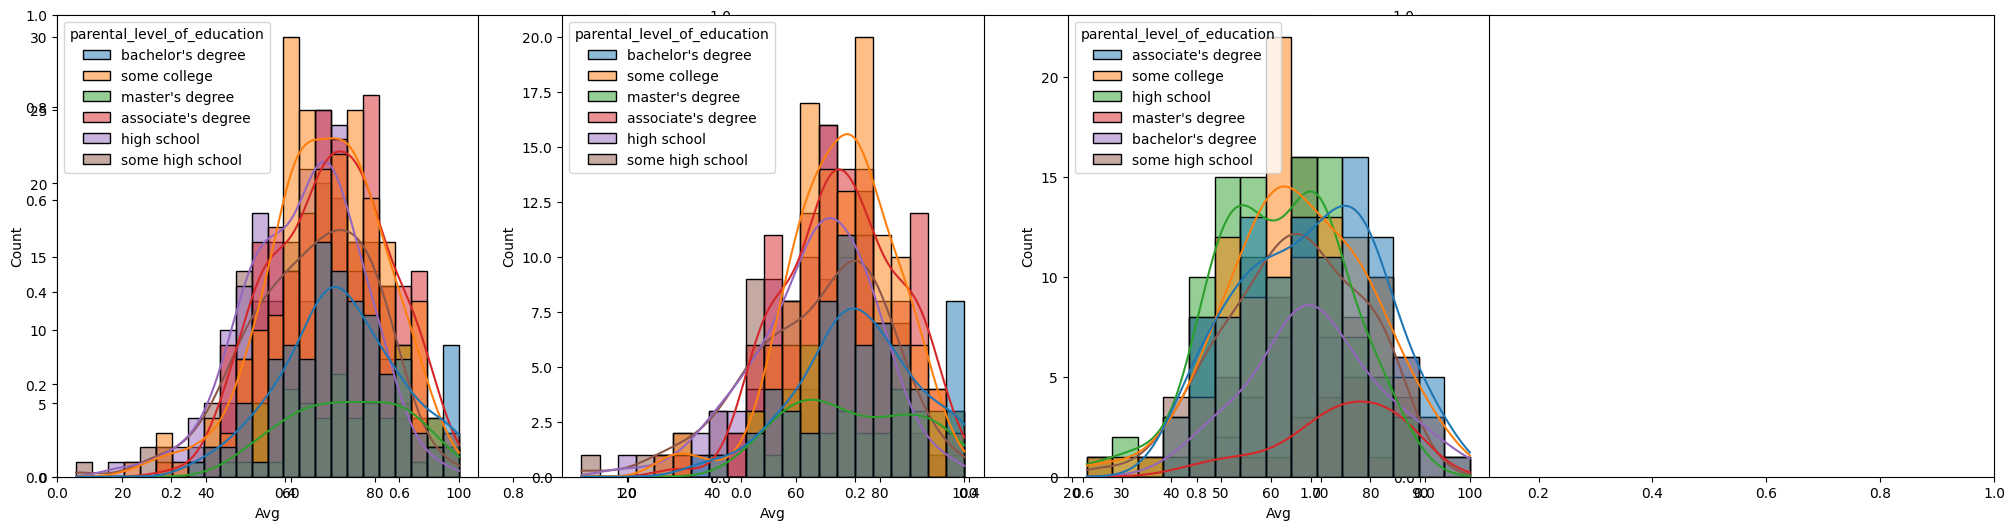

In [39]:
fig, axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Avg', kde=True, hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Avg', kde=True, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='Avg', kde=True, hue='parental_level_of_education')


<Axes: xlabel='Avg', ylabel='Count'>

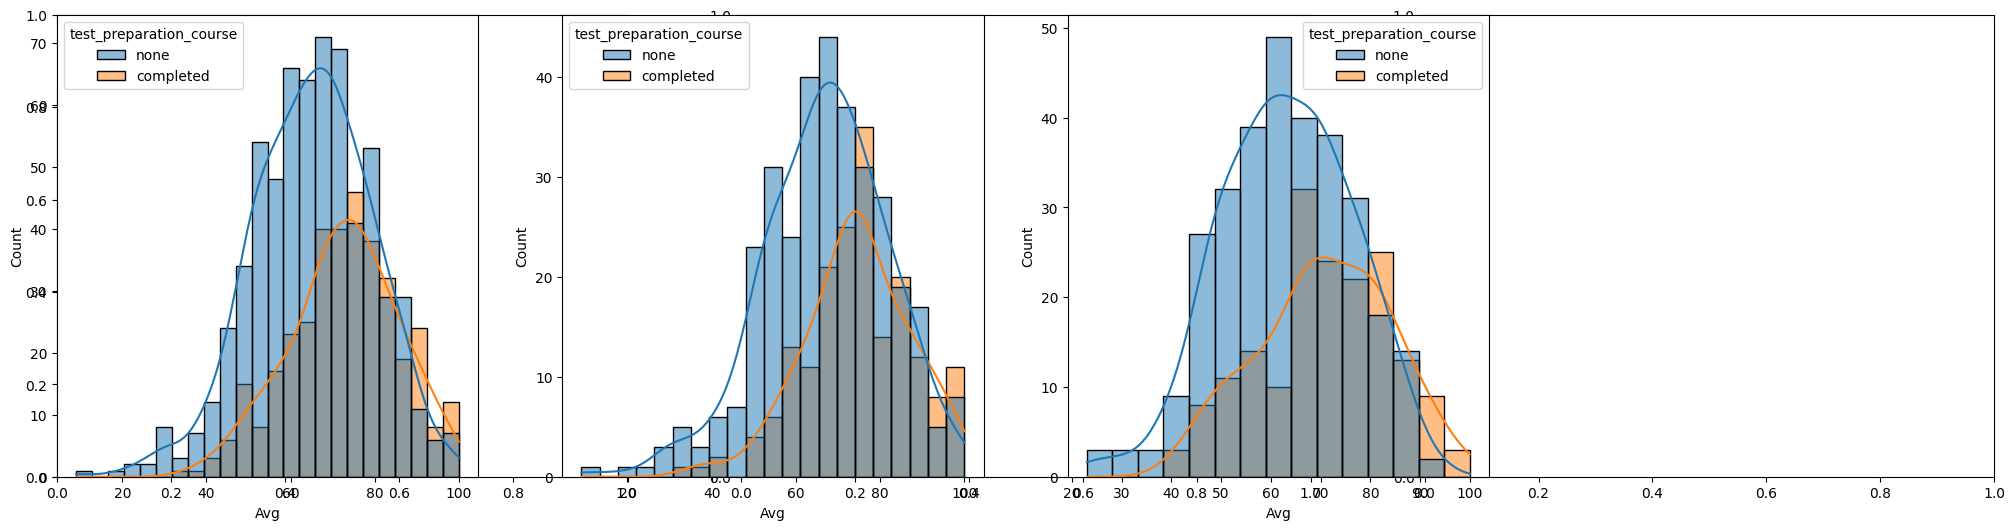

In [40]:
fig, axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Avg', kde=True, hue='test_preparation_course')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Avg', kde=True, hue='test_preparation_course')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='Avg', kde=True, hue='test_preparation_course')


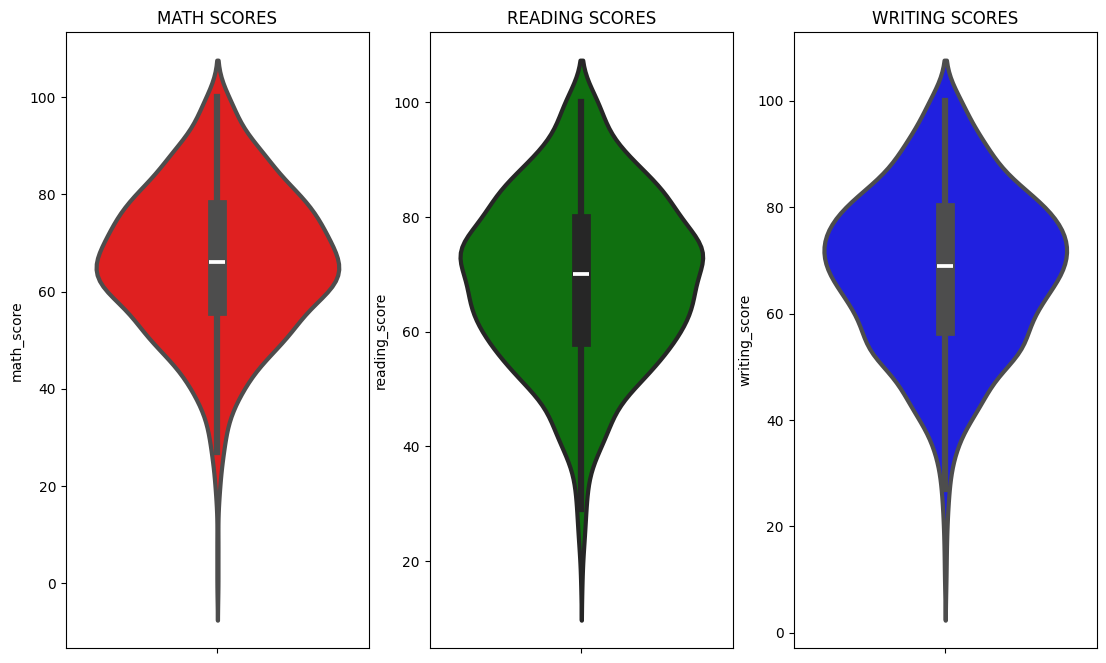

In [43]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

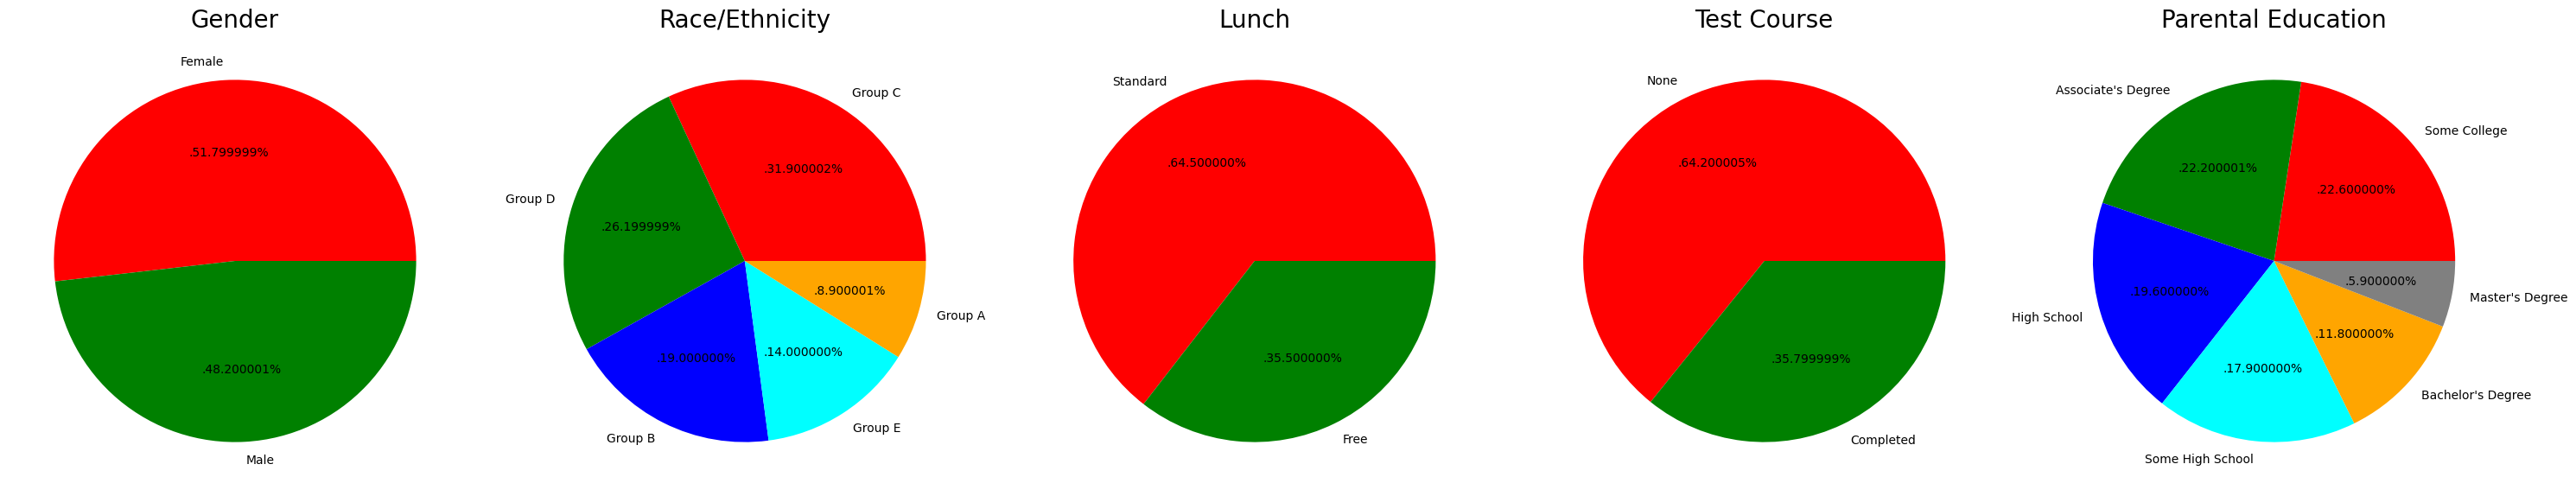

In [49]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   Total_score                  1000 non-null   int64  
 9   Avg                          1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


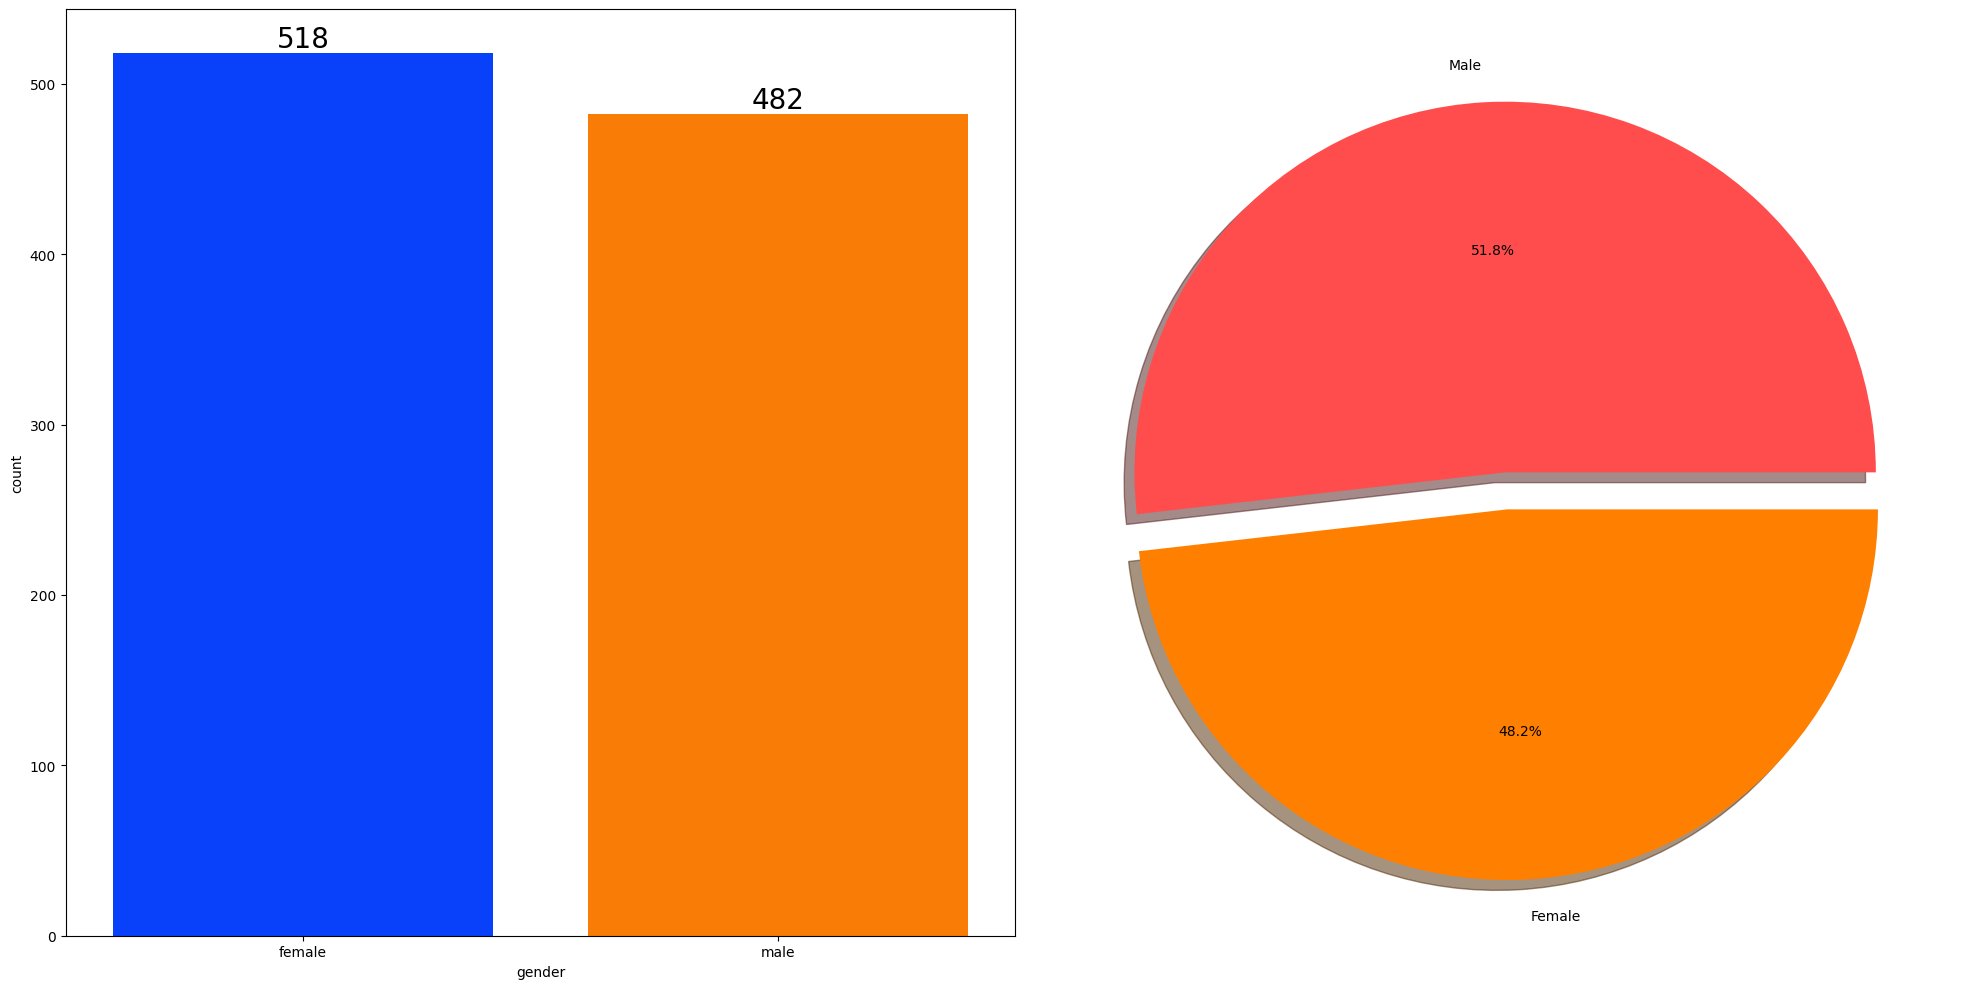

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot (Bar Plot)
sns.countplot(x='gender', data=df, palette='bright', ax=ax[0], saturation=0.95)

# Add value labels to bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(
    x=df['gender'].value_counts(),
    labels=['Male', 'Female'],
    explode=[0, 0.1],
    autopct='%1.1f%%',
    shadow=True,
    colors=['#ff4d4d', '#ff8000']
)

plt.tight_layout()
plt.show()


In [54]:
gender_group = df.groupby('gender').mean()
gender_group

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

In [ ]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [ ]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

In [ ]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

In [ ]:
sns.pairplot(df,hue = 'gender')
plt.show()